## 1. Welcome!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

In [67]:
# import package
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [68]:
# load file
df_oe = pd.read_csv('datasets/office_episodes.csv')
df_oe.head()

,episode_number,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,scaled_ratings
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,2005-03-24,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,False,0.28125
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,2005-03-29,NaN,Ken Kwapis,B. J. Novak,False,0.53125
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,2005-04-05,NaN,Ken Whittingham,Paul Lieberstein,False,0.37500
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,2005-04-12,NaN,Bryan Gordon,Michael Schur,False,0.46875
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,2005-04-19,NaN,Greg Daniels,Greg Daniels,False,0.56250


## 1. Create a matplotlib scatter plot of the data that contains the following attributes:

- Each episode's episode number plotted along the x-axis
- Each episode's viewership (in millions) plotted along the y-axis
- A color scheme reflecting the scaled ratings (not the regular ratings) of each episode, such that:
    * Ratings < 0.25 are colored "red"
    * Ratings >= 0.25 and < 0.50 are colored "orange"
    * Ratings >= 0.50 and < 0.75 are colored "lightgreen"
    * Ratings >= 0.75 are colored "darkgreen"
- A sizing system, such that episodes with guest appearances have a marker size of 250 and episodes without are sized 25
- A title, reading "Popularity, Quality, and Guest Appearances on the Office"
- An x-axis label reading "Episode Number"
- A y-axis label reading "Viewership (Millions)"

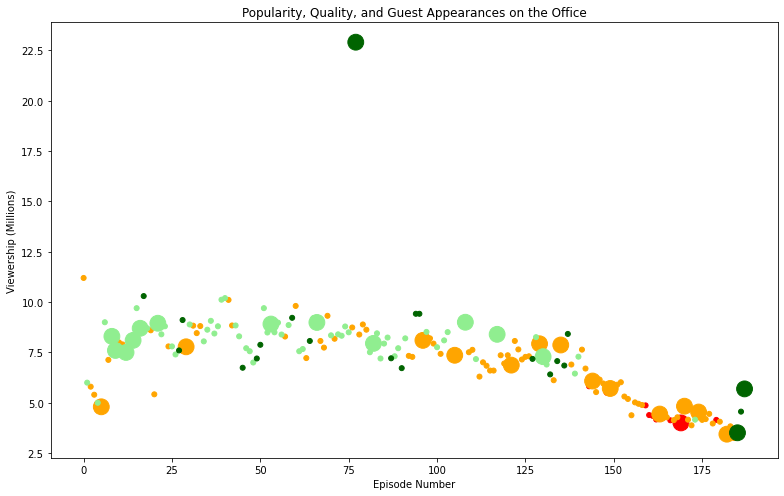

In [69]:
# four kinds of ratings points
oe1 = df_oe[df_oe['scaled_ratings']<0.25]
oe2 = df_oe[np.logical_and(df_oe['scaled_ratings']>=0.25,df_oe['scaled_ratings']<0.5)]
oe3 = df_oe[np.logical_and(df_oe['scaled_ratings']>=0.5,df_oe['scaled_ratings']<0.75)]
oe4 = df_oe[df_oe['scaled_ratings']>=0.75]

# initialize the figure
fig = plt.figure()

# plt scatter
plt.scatter(oe1['episode_number'],oe1['viewership_mil'],c='red',s=25*(1-oe1['has_guests'])+250*oe1['has_guests'])
plt.scatter(oe2['episode_number'],oe2['viewership_mil'],c='orange',s=25*(1-oe2['has_guests'])+250*oe2['has_guests'])
plt.scatter(oe3['episode_number'],oe3['viewership_mil'],c='lightgreen',s=25*(1-oe3['has_guests'])+250*oe3['has_guests'])
plt.scatter(oe4['episode_number'],oe4['viewership_mil'],c='darkgreen',s=25*(1-oe4['has_guests'])+250*oe4['has_guests'])

# plt set title and labels
plt.title('Popularity, Quality, and Guest Appearances on the Office')
plt.xlabel('Episode Number')
plt.ylabel('Viewership (Millions)')

# set size
plt.rcParams['figure.figsize'] = [11,7]

# show figure
plt.show()


<div class="alert alert-block alert-danger">
### Other solutions 

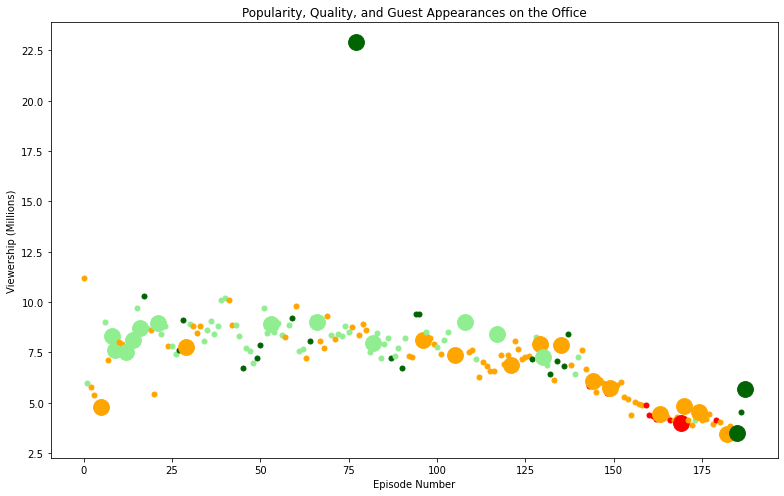

In [70]:
# four kinds of ratings points
oe1 = df_oe[df_oe['scaled_ratings']<0.25]
oe2 = df_oe[np.logical_and(df_oe['scaled_ratings']>=0.25,df_oe['scaled_ratings']<0.5)]
oe3 = df_oe[np.logical_and(df_oe['scaled_ratings']>=0.5,df_oe['scaled_ratings']<0.75)]
oe4 = df_oe[df_oe['scaled_ratings']>=0.75]

# initialize the figure
fig = plt.figure()

# plt scatter
for ind, row in df_oe.iterrows():
    if row['scaled_ratings']<0.25:
        plt.scatter(row['episode_number'],row['viewership_mil'],c='red',s=25*(1-row['has_guests'])+250*row['has_guests'])
    elif row['scaled_ratings']>=0.25 and row['scaled_ratings']<0.5:
        plt.scatter(row['episode_number'],row['viewership_mil'],c='orange',s=25*(1-row['has_guests'])+250*row['has_guests'])
    elif row['scaled_ratings']>=0.5 and row['scaled_ratings']<0.75:
        plt.scatter(row['episode_number'],row['viewership_mil'],c='lightgreen',s=25*(1-row['has_guests'])+250*row['has_guests'])
    else:
        plt.scatter(row['episode_number'],row['viewership_mil'],c='darkgreen',s=25*(1-row['has_guests'])+250*row['has_guests'])

# plt set title and labels
plt.title('Popularity, Quality, and Guest Appearances on the Office')
plt.xlabel('Episode Number')
plt.ylabel('Viewership (Millions)')

# set size
plt.rcParams['figure.figsize'] = [11,7]

# show figure
plt.show()


## 2. Provide the name of one of the guest stars (hint, there were multiple!) who was in the most watched Office episode. Save it as a string in the variable top_star (e.g. top_star = "Will Ferrell").

In [72]:
top_ep = df_oe[df_oe['viewership_mil'] == max(df_oe['viewership_mil'])]
top_stars = str(top_ep['guest_stars'].values).lstrip("['").rstrip("']").split(", ")
top_star = top_stars[0]
print(top_star)

Cloris Leachman


## Bonus Step!
Although it was not taught in Intermediate Python, a useful skill for visualizing different data points is to use a different marker. You can learn more about them via the Matplotlib documentation or via our course Introduction to Data Visualization with Matplotlib. Thus, as a bonus step, try to differentiate guest appearances not just with size, but also with a star!

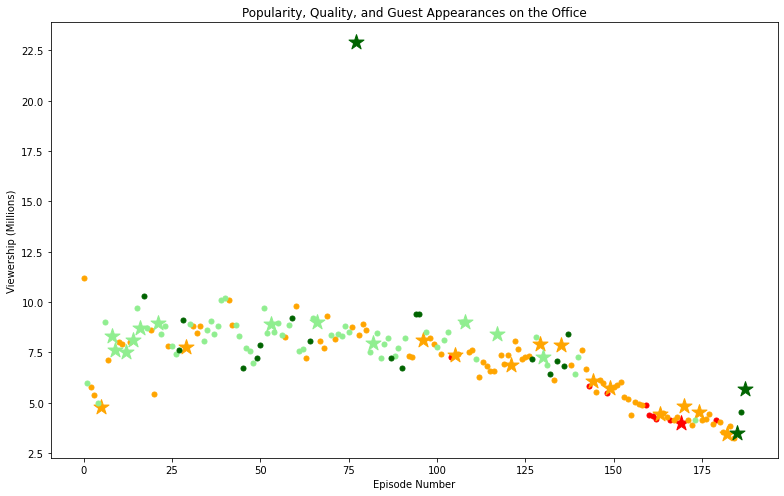

In [73]:
from matplotlib.markers import MarkerStyle

# four kinds of ratings points
oe1 = df_oe[np.logical_and(df_oe['scaled_ratings']<0.25,df_oe['has_guests']==False)]
oe1_star = df_oe[np.logical_and(df_oe['scaled_ratings']<0.25,df_oe['has_guests']==True)]
oe2 = df_oe[np.logical_and(np.logical_and(df_oe['scaled_ratings']>=0.25,df_oe['scaled_ratings']<0.5),df_oe['has_guests']==False)]
oe2_star = df_oe[np.logical_and(np.logical_and(df_oe['scaled_ratings']>=0.25,df_oe['scaled_ratings']<0.5),df_oe['has_guests']==True)]
oe3 = df_oe[np.logical_and(np.logical_and(df_oe['scaled_ratings']>=0.5,df_oe['scaled_ratings']<0.75),df_oe['has_guests']==False)]
oe3_star = df_oe[np.logical_and(np.logical_and(df_oe['scaled_ratings']>=0.5,df_oe['scaled_ratings']<0.75),df_oe['has_guests']==True)]
oe4 = df_oe[np.logical_and(df_oe['scaled_ratings']>=0.75,df_oe['has_guests']==False)]
oe4_star = df_oe[np.logical_and(df_oe['scaled_ratings']>=0.75,df_oe['has_guests']==True)]

# initialize the figure
fig2 = plt.figure()

# plt scatter
plt.scatter(oe1['episode_number'],oe1['viewership_mil'],c='red',s=25)
plt.scatter(oe1_star['episode_number'],oe1_star['viewership_mil'],c='red',s=250,marker='*')
plt.scatter(oe2['episode_number'],oe2['viewership_mil'],c='orange',s=25)
plt.scatter(oe2_star['episode_number'],oe2_star['viewership_mil'],c='orange',s=250,marker='*')
plt.scatter(oe3['episode_number'],oe3['viewership_mil'],c='lightgreen',s=25)
plt.scatter(oe3_star['episode_number'],oe3_star['viewership_mil'],c='lightgreen',s=250,marker='*')
plt.scatter(oe4['episode_number'],oe4['viewership_mil'],c='darkgreen',s=25)
plt.scatter(oe4_star['episode_number'],oe4_star['viewership_mil'],c='darkgreen',s=250,marker='*')

# plt set title and labels
plt.title('Popularity, Quality, and Guest Appearances on the Office')
plt.xlabel('Episode Number')
plt.ylabel('Viewership (Millions)')

# set size
plt.rcParams['figure.figsize'] = [11,7]

# show figure
plt.show()